#Αριθμητική Ανάλυση Ομάδα Ασκήσεων 2
##Ποζουκίδης Δημήτρης 15016

Ο κώδικας γράφτηκε σε συνεργασία με τον αδερφό μου, Ποζουκίδη Χαράλαμπο.

Link Notebook:[https://colab.research.google.com/drive/1NBB5E91NXw6clRF4lTBRqzYJsl6t-3xN?usp=sharing](https://colab.research.google.com/drive/1NBB5E91NXw6clRF4lTBRqzYJsl6t-3xN?usp=sharing)



## Θέμα 1

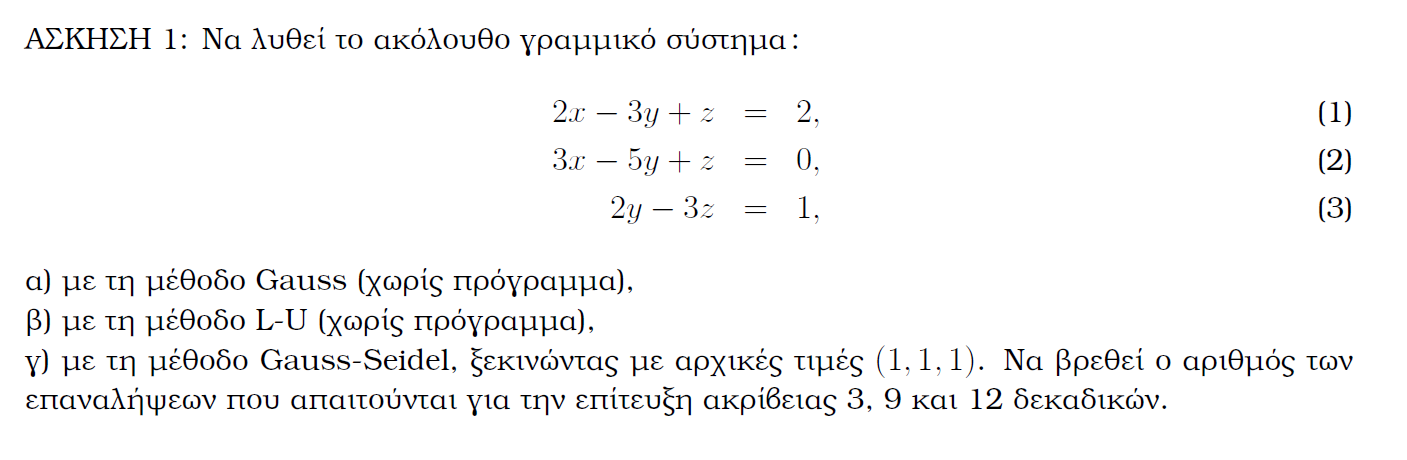

### α)

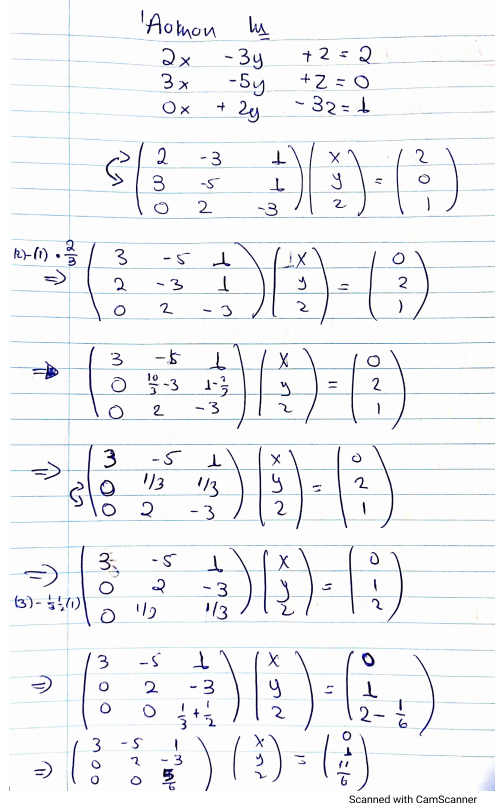

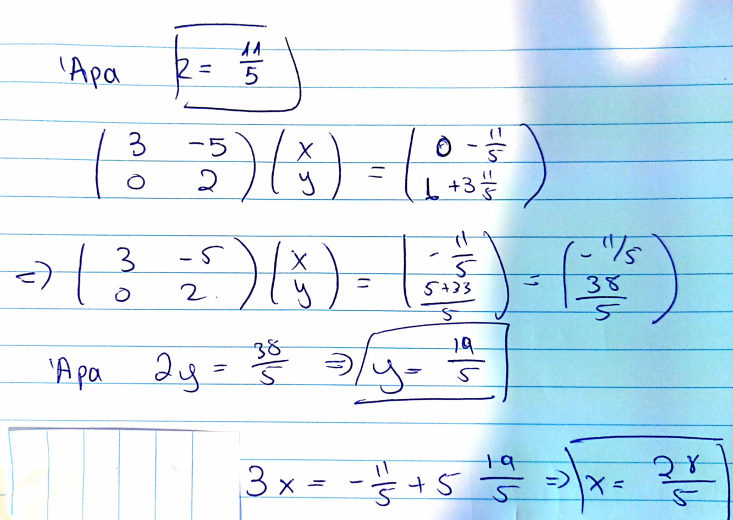

### β)

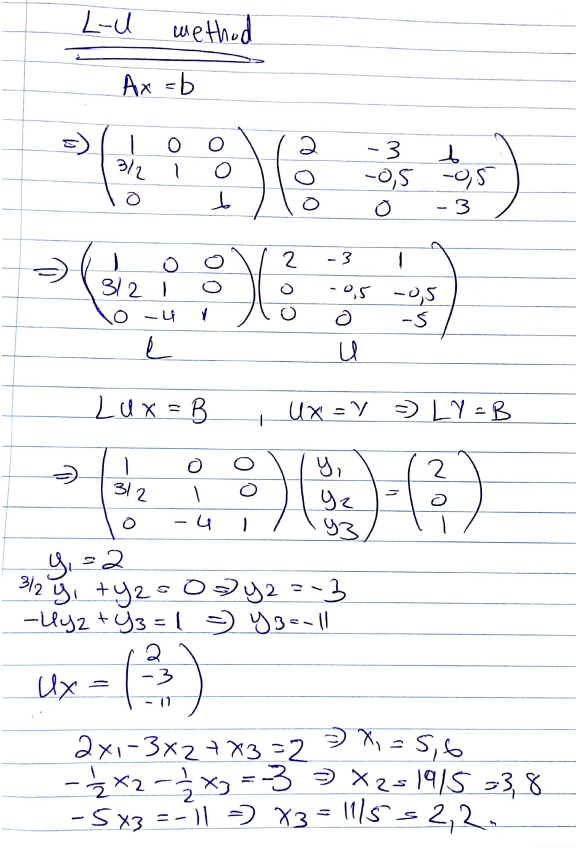

### γ)

In [ ]:
#functions
x=lambda y,z:(2+3*y-z)/2
y=lambda x,z:(3*x+z)/5
z=lambda y:(2*y-1)/3

In [ ]:
#Gauss-Seidel
def gs(x0,sx,y0,sy,z0,sz,error):
  k=0
  while abs(sx-x0)>=error or abs(sy-y0)>=error or abs(sz-z0)>=error:
    k+=1
    x0=x(y0,z0)
    y0=y(x0,z0)
    z0=z(y0)
  print("x=",x0,"y=",y0,"z=",z0)
  return k

In [ ]:
#main
errors=[1E-3,1E-6,1E-12]
for error in errors:
  k=gs(1,5.6,1,3.8,1,2.2,error)
  print(k,"iterations") 

x= 5.599081279927164 y= 3.799343771376546 z= 2.199562514251031
46 iterations
x= 5.599999099889444 y= 3.799999357063888 z= 2.1999995713759253
84 iterations
x= 5.599999999999135 y= 3.7999999999993817 z= 2.1999999999995876
160 iterations


Λύση συστήματος: $\begin{align}
    Χ &= \begin{bmatrix}
           5.6 \\
           3.8 \\
           2.2 \\
         \end{bmatrix}
  \end{align}$ και η μέθοδος Gauss-Seidel χρειάζεται $160$ επαναλήψεις για να πετύχει ακρίβεια $12$ δεκαδικών.

## Θέμα 2

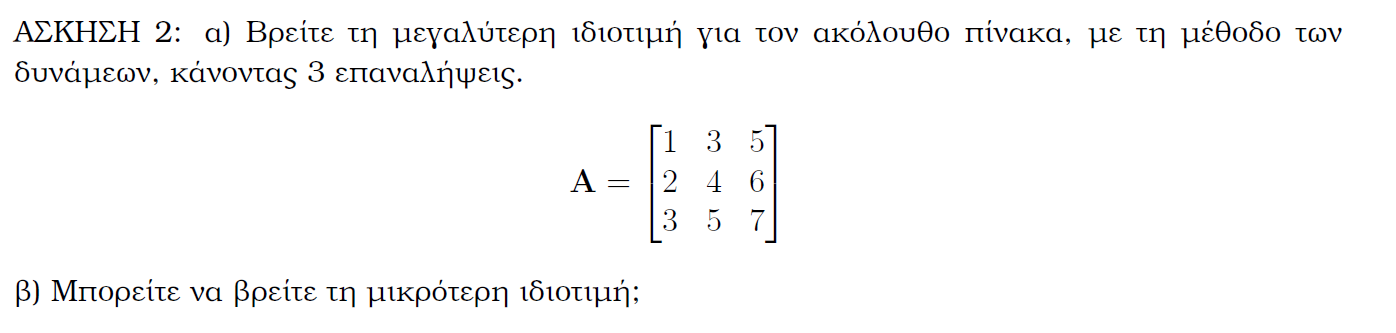

Πραγματικές ιδιοτιμές: $\lambda_1=0,\lambda_2=-4\sqrt{3}+6,\lambda_3=4\sqrt{3}+6$

###Μέθοδος δυνάμεων

In [ ]:
#power method
import numpy as np

In [ ]:
def powerMethod(A,iterations):
  vec=np.matrix([[1],[1]])
  for i in range (0,iterations):
    vec=np.dot(A,vec)
    #print("eigenvector",i)
    #print(vec)

    if i==iterations-2:
      e1=vec[0,0]
    elif i==iterations-1:
      e2=vec[0,0]
  return e2/e1

In [ ]:
#main
iterations=3
A=np.matrix([[2,-4],[6,-8]])
print("Biggest eigenvalue of \n",A,"\n after",iterations,"iterations of the power method:\n",powerMethod(A,iterations))

Biggest eigenvalue of 
 [[1 3]
 [2 4]] 
 after 3 iterations of the power method:
 5.363636363636363


Άρα λοιπόν βρήκαμε τη μεγαλύτερη ιδιοτιμή $12.9$ και πράγματι $\lambda_3=4\sqrt{3}+6\approx 12.9$.

Επίσης ισχύει πως $det|A|=0$ άρα ο πίνακας δεν αντιστρέφεται για να βρούμε την μικρότερη ιδιοτιμή.

## Θέμα 3

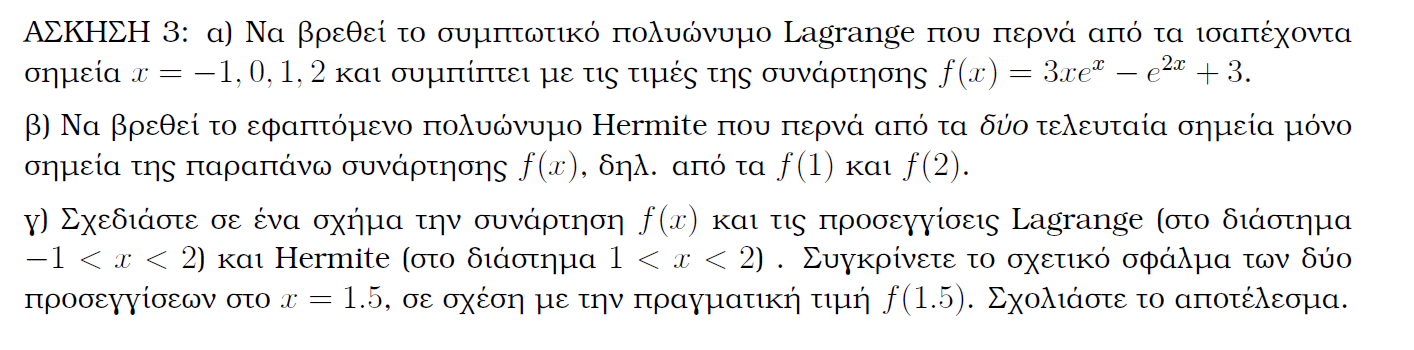

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

###Lagrange Polynomial

In [ ]:
def lagrange(x,data,f):
  sum=0
  length=len(data)
  for i in range(0,length):
    sum+=Lj(i,x,data)*f(data[i])
  return sum

def Lj(j,x,data):
  prod=1
  length=len(data)
  for i in range (0,length):
    if i!=j:
      prod=prod*(x-data[i])/(data[j]-data[i])
  return prod


def Ldj(j,x,data):
  prod=1
  length=len(data)
  for i in range (0,length):
    if i!=j:
      prod=prod*1/(data[j]-data[i])
  return prod

### Hermite Polynomial



In [ ]:
def hermite(x,data,dvalues,f):
  sum=0
  length=len(data)
  for i in range(0,length):
    sum+=Ai(i,x,data)*f(data[i])+Bi(i,x,data)*dvalues[i]
  return sum

def Ai(i,x,data):
  return (1-2*(x-data[i])*Ldj(i,x,data))*Lj(i,x,data)**2

def Bi(i,x,data):
  return (x-data[i])*Lj(i,x,data)**2

### Graphing function

In [ ]:
def makegraph(a,b,step,f,data1,data2):
  t = np.arange(a,b,step)
  t1= np.arange(1,2,step)
  vf=np.vectorize(f)
  data=vf(t)

  data2m=data2[-101:-1]

  

  fig, ax = plt.subplots()
  ax.plot(t,data,'-g',label='f')
  ax.plot(t,data1,'-r',label='Lagrange')
  ax.plot(t1,data2m,'-b',label='Hermite')

  ax.legend(loc='lower left', frameon=True)

  ax.set(xlabel='x', ylabel='f',
        title='f(x)=3exp(x)*x-exp(2x)+3')
  ax.grid()

  fig.savefig("test.png")
  plt.show()

###main()

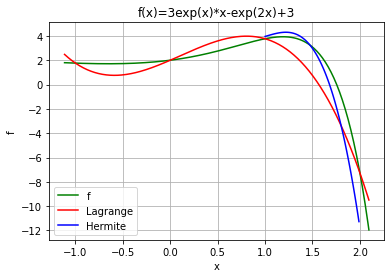

In [ ]:
#function
f=lambda x:3*x*math.exp(x)-math.exp(2*x)+3

points=[-1,0,1,2]
dataHermite=[1,2]
dvaluesHermite=[6*math.exp(1)-2*math.exp(2),9*math.exp(2)-2*math.exp(4)]

a=-1.115
b=2.1
step=0.01

x=a

myLagrange=[]
myHermite=[]
while x<=b:
  myLagrange.append(lagrange(x,points,f))
  myHermite.append(hermite(x,dataHermite,dvaluesHermite,f))
  x+=step

makegraph(a,b,step,f,myLagrange,myHermite)

### Error Analysis

In [ ]:
x=1.5
print("For x=",x,":")
print("f is",f(x),"lagrange prediction is ",lagrange(x,points,f),"error is",abs(f(x)-lagrange(x,points,f)))
print("f is",f(x),"hermite preditction is",hermite(x,dataHermite,dvaluesHermite,f),"error is",abs(f(x)-hermite(x,dataHermite,dvaluesHermite,f)))

For x= 1.5 :
f is 3.082063893333622 lagrange prediction is  0.7455499995090409 error is 2.336513893824581
f is 3.082063893333622 hermite preditction is 3.7792847170437724 error is 0.6972208237101505


Φαίνεται από τα παραπάνω αποτελέσματα πως στη περιοχή (1,2) είναι πολύ καλύτερο το πολυώνυμο Hermite. Αυτό είναι λογικό να συμβαίνει μιας και οι επιπλέον πληροφορίες που χρησιμοποιεί το Hermite (Οι παράγωγοι στο 1 και 2) είναι κοντά σε αυτήν την περιοχή. Οι επιλέον πληροφορίες που χρησιμοποιεί το Lagrange είναι οι τιμές της f στα σημεία -1 και 0 που δεν είναι τόσο χρήσιμα για τη συμπεριφορά στο (1,2).